In [1]:
!pip install idx2numpy
!pip install python_mnist

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=238ac14274114ed6f2d22765b22c8d7ff9a04db124afa0e15a502db67258d603
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [23]:
import idx2numpy
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
from mnist import MNIST
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_data=idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/train-images-idx3-ubyte')
train_data = np.reshape(train_data,(60000,28*28))
train_label = idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/train-labels-idx1-ubyte')
print(train_data.shape)
print(train_label.shape)

(60000, 784)
(60000,)


In [5]:
test_data=idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/t10k-images-idx3-ubyte')
test_data = np.reshape(test_data,(10000,28*28))
test_label = idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/t10k-labels-idx1-ubyte')
print(test_data.shape)
print(test_label.shape)

(10000, 784)
(10000,)


In [6]:
mnist_loader = MNIST('/content/drive/My Drive/MNIST')
train_data, train_label = mnist_loader.load_training()
test_data, test_label = mnist_loader.load_testing()
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
train_data[train_label == 1].shape


In [7]:
#Gathering only 5,8 labels of data
nx_train=[]
ny_train=[]
digit_1 = 0
for i in range(len(train_data)):
    if train_label[i] == 5 or train_label[i] == 8:
        nx_train.append(train_data[i])
        ny_train.append(train_label[i])
        digit_1 += 1

nx_train=np.array(nx_train)
ny_train=np.array(ny_train)

print(nx_train.shape)
print(ny_train.shape)
print(ny_train[0:10])

(11272, 784)
(11272,)
[5 5 8 8 5 8 8 5 8 5]


In [8]:
nx_test=[]
ny_test=[]
digit_1 = 0
for i in range(len(test_data)):
    if test_label[i] == 5 or test_label[i] == 8:
        nx_test.append(test_data[i])
        ny_test.append(test_label[i])
        digit_1 += 1

nx_test=np.array(nx_test)
ny_test=np.array(ny_test)

print(nx_test.shape)
print(ny_test.shape)
print(ny_test[0:10])

(1866, 784)
(1866,)
[5 5 5 5 5 5 5 8 8 5]


In [9]:
X=nx_train/255.0
Y=ny_train
X_test=nx_test/255.0
Y_test=ny_test

In [10]:
print('Traning linear SVM...')
linear_svc=svm.SVC(kernel='linear',gamma='auto', C=5).fit(X,Y)

Traning linear SVM...


In [11]:
print('Traning Non linear SVM...')
rbf_svc = svm.SVC(kernel='rbf',gamma='auto', C=5).fit(X,Y)
print('Done')

Traning Non linear SVM...
Done


In [12]:
print('Pridicting...')
y_predict_linear=linear_svc.predict(X_test)
y_predict_nonlinear=rbf_svc.predict(X_test)
print('Done')


Pridicting...
Done


In [13]:
print(y_predict_nonlinear[0:15])
print(Y_test[0:15])

[5 5 5 5 5 5 5 8 8 5 8 5 5 8 5]
[5 5 5 5 5 5 5 8 8 5 8 5 5 8 5]


In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy rate of Linear SVM:",accuracy_score(y_predict_linear,Y_test)*100,"%")
print("Accuracy rate Non Linear SVM:",accuracy_score(y_predict_nonlinear,Y_test)*100,"%")
# The accuracy of non Linear Gaussian RBF kernel is slightly higher then the linear svm

Accuracy rate of Linear SVM: 95.28403001071811 %
Accuracy rate Non Linear SVM: 97.69560557341907 %


In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict_linear))

              precision    recall  f1-score   support

           5       0.95      0.96      0.95       892
           8       0.96      0.95      0.95       974

    accuracy                           0.95      1866
   macro avg       0.95      0.95      0.95      1866
weighted avg       0.95      0.95      0.95      1866



In [24]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

In [25]:
%matplotlib inline
# Gradient Descent
def  cal_cost(theta,X,y):
    '''
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    where:
        j is the no of features
    '''
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [26]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [27]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.137,
Theta1:          2.937
Final cost/MSE:  5257.556


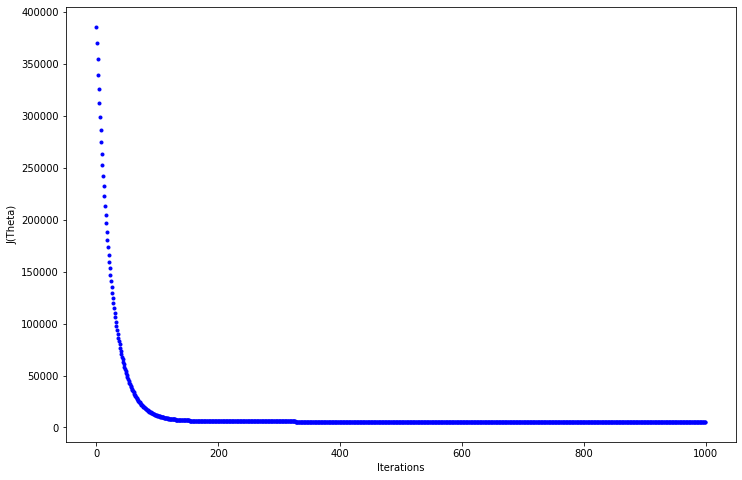

In [28]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')